# K最邻近算法
## 算法原理
K-Nearest Neighbors离谁最近，就属于谁。如果最邻近数等于1，可能会“一叶障目，不见泰山”。
## 用法
### 分类任务

In [1]:
# ================近朱者赤近墨者黑================
# 用sklearn搭建KNN
import IPython
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#以下支持中文字体，可以删除
from matplotlib.font_manager import FontProperties
%matplotlib inline
myfont = FontProperties(fname="C:\Windows\Fonts\simsun.ttc")
plt.rcParams['font.sans-serif'] = [myfont.get_name()]  # 中文字体设置-宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [189]:
# 生成样本数为200，分类为2的随机数据集，种子为8
data = make_blobs(n_samples=200, centers =2, random_state=8)
X, y = data
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,0,1
0,6.754451,9.745319
1,6.805260,-0.290929
2,7.079786,7.814277
3,6.874720,-0.160699
4,8.061641,8.437370
...,...,...
195,7.829448,9.626272
196,6.093823,9.380444
197,7.242110,7.485069
198,8.263416,10.347234


,0
0,0
1,1
2,0
3,1
4,0
...,...
195,0
196,0
197,0
198,0


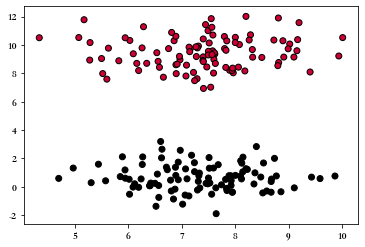

In [190]:
# 红与黑绘图
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(['#CC0033','#000000']), edgecolor='k')
plt.show()

**[结果分析]** 根据已知数据对未知数据进行分类

In [183]:
?KNeighborsClassifier

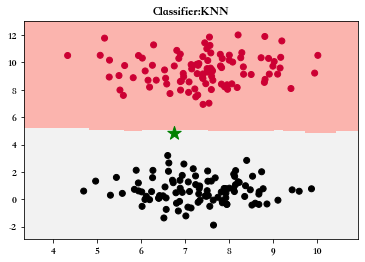

In [192]:
# 建立KNN分类器
clf = KNeighborsClassifier()
clf.fit(X,y)

# 下面的代码用于画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors.ListedColormap(['#CC0033','#000000']))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("Classifier:KNN")

plt.scatter(6.75,4.82, marker='*',c='green', s=200)

plt.show()

In [121]:
print('新数据点的分类是:',clf.predict([[6.75,3.82]]))

新数据点的分类是: [1]


**[结果分析]** 新数据点和黑色归为一类。

- 练习：近朱者赤近墨者黑分类器，让未知数据点归于所属分类，并显示对应的颜色

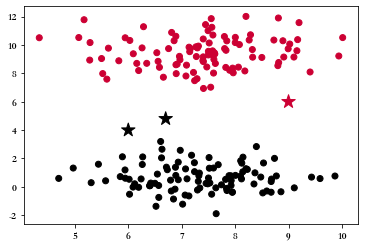

In [193]:
# 近朱者赤近墨者黑分类器 练习
# 画底图
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors.ListedColormap(['#CC0033','#000000']))
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.title("KNN: 近朱者赤近墨者黑")

# 读取数据
DATA_PATH = './test.xlsx'        
data = pd.read_excel(DATA_PATH)
X_pre=np.array(data)
# 分类预测
Y_pre=np.array(clf.predict(list(X_pre)))
plt.scatter(X_pre[:,0],X_pre[:,1], c=Y_pre,cmap=colors.ListedColormap(['#CC0033','#000000']), marker='*', s=200)
plt.show()

### KNN处理多元分类任务

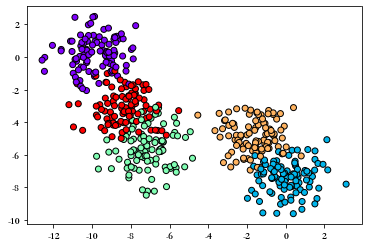

In [194]:
data2 = make_blobs(n_samples=500, centers=5,random_state=9)
X2,y2 = data2
# 散点数据可视化
plt.scatter(X2[:,0],X2[:,1],c=y2, cmap=plt.cm.rainbow, edgecolor='k')
plt.show()

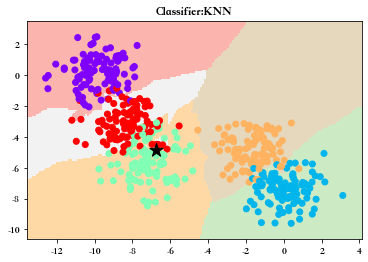

In [198]:
data2 = make_blobs(n_samples=500, centers=5,random_state=9)
X2,y2 = data2

clf = KNeighborsClassifier()
clf.fit(X2,y2)

#下面的代码用于画图
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
plt.scatter(-6.75,-4.82, marker='*',c='black', s=200)
plt.show()

In [158]:
print('模型正确率：{:.2f}'.format(clf.score(X2,y2)))

模型正确率：0.94


### KNN用于回归分析

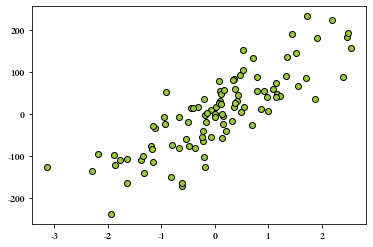

In [162]:
# 导入make_regression数据集生成器
from sklearn.datasets import make_regression
# 生成特征数量为1，噪音为50的数据集
X, y = make_regression(n_features=1,n_informative=1,noise=50,random_state=8)
# 用散点图可视化
plt.scatter(X,y,c='#99cc33',edgecolor='k')
plt.show()

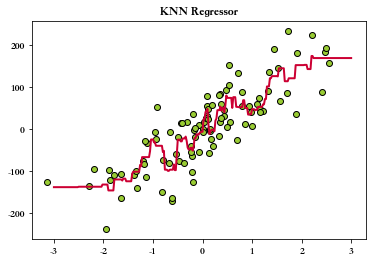

模型评分：0.77


In [172]:
# 导入回归分析用的KNN模型
from sklearn.neighbors import KNeighborsRegressor
# 默认情况下，n_neighbors=5
reg = KNeighborsRegressor(n_neighbors=5)
# 用KNN模型拟合数据
reg.fit(X,y)
# 预测结果可视化
z = np.linspace(-3,3,301).reshape(-1,1)
plt.scatter(X,y,c='#99cc33',edgecolor='k')
plt.plot(z, reg.predict(z),c='#cc0033',linewidth=2)
plt.title('KNN Regressor')
plt.show()

In [173]:
print('模型评分：{:.2f}'.format(reg.score(X,y)))

模型评分：0.77


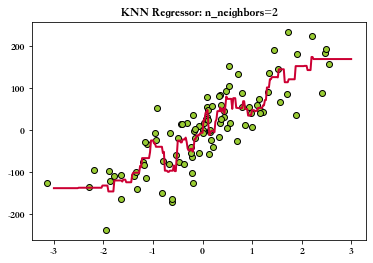

In [176]:
from sklearn.neighbors import KNeighborsRegressor
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(X,y)
plt.scatter(X,y,c='#99cc33',edgecolor='k')
plt.plot(z, reg.predict(z),c='#cc0033',linewidth=2)
plt.title('KNN Regressor: n_neighbors=2')
plt.show()

In [177]:
print('模型评分：{:.2f}'.format(reg2.score(X,y)))

模型评分：0.86
